In [2]:
import importlib.util
spec = importlib.util.spec_from_file_location("BoundaryLayerToolbox", "/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)
import matplotlib
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
from netCDF4 import Dataset
import os
import pandas as pd
pd.set_option('html', False)
from IPython import display
from matplotlib import animation
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA


xlat = np.loadtxt("/Users/claudiopierard/VC/datos/xlat_d02_interpolado.txt")
xlong = np.loadtxt("/Users/claudiopierard/VC/datos/xlong_d02_interpolado.txt")
hgt = np.loadtxt("/Users/claudiopierard/VC/datos/hgt_d02_interpolado.txt")
months = {1:'jan', 2:'feb', 3:'mar',4: 'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dic'}
path2datosVC = "../datos/dataframes_VC/cca/"
path2pollutants = "../datos/contaminantes/2015/CCA/"

path2estaciones = "../datos/loc_estaciones/air_quality_stn.xy"
estaciones = pd.read_table(path2estaciones, index_col=0, names=['long','lat', 'height'])
estaciones = estaciones.transpose().to_dict()
estaciones['CCA']

{'height': 2294.0, 'lat': 19.326110999999997, 'long': -99.176110999999992}

# Contaminantes

In [31]:
o3_2015 = pd.read_csv(path2pollutants + "CCA_o3_2015.csv", index_col=0)
o3_2015.index = pd.to_datetime(o3_2015.index)

In [32]:
pm25_2015 = pd.read_csv(path2pollutants + "CCA_pm25_2015.csv", index_col=0)
pm25_2015.index = pd.to_datetime(pm25_2015.index)

In [33]:
co_2015 = pd.read_csv(path2pollutants + "CCA_co_2015.csv", index_col=0)
co_2015.index = pd.to_datetime(co_2015.index)

In [34]:
pm25_2015.head()

                    station   pm25
2015-01-01 01:00:00     CCA  118.0
2015-01-01 02:00:00     CCA  107.0
2015-01-01 03:00:00     CCA  121.0
2015-01-01 04:00:00     CCA  124.0
2015-01-01 05:00:00     CCA  123.0

# Jan

In [14]:
jan_vc = pd.read_csv(path2datosVC + "jan_dataframe_cca.csv", index_col=0)
jan_vc.index = pd.to_datetime(jan_vc.index)

## O3

In [27]:
o3_2015["2015-01-01":"2015-01-31"]['o3'].head()

2015-01-01 01:00:00    2.0
2015-01-01 02:00:00    4.0
2015-01-01 03:00:00    1.0
2015-01-01 04:00:00    2.0
2015-01-01 05:00:00    1.0
Name: o3, dtype: float64

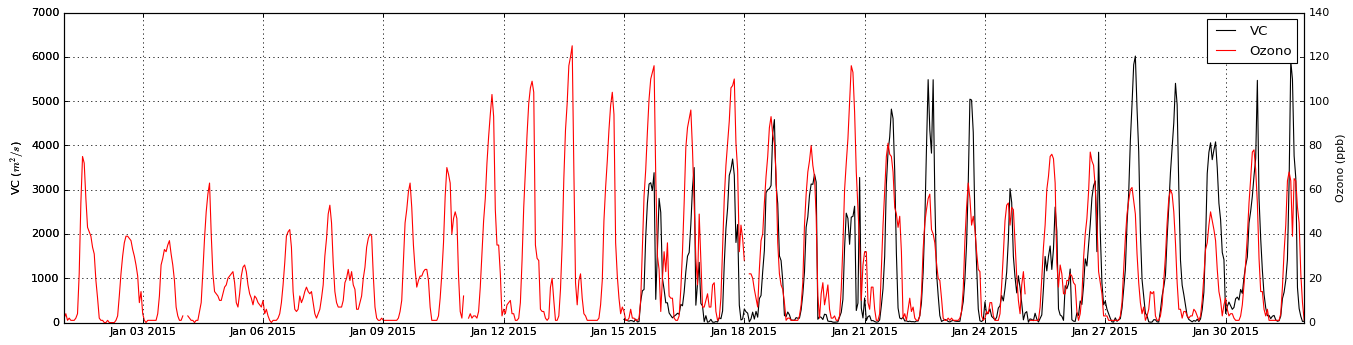

In [29]:
plt.figure(figsize=[20,5])
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust()
par1 = host.twinx()

#offset = 60
#new_fixed_axis = par2.get_grid_helper().new_fixed_axis

#host.set_xlim(0, 13)
#host.set_ylim(0, 2)

#host.set_xlabel("Días")
host.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("Ozono (ppb)")

#host.scatter(np.linspace(1,12, 12), vc_max_mes, marker='d', c = 'k')
host.plot(jan_vc['VC_24'],  c = 'k', label = 'VC')

#par1.scatter(np.linspace(1,12, 12), o3_max_mes, marker='s', c = 'r')
par1.plot(o3_2015["2015-01-01":"2015-01-31"]['o3'], c = 'r', label = 'Ozono')
#par1.set_ylim(0, 4)

host.legend()
host.grid()
#host.axis["left"].label.set_color(p1.get_color())
#par1.axis["right"].label.set_color(p2.get_color())
#host.set_xticks(range(1,13));
#host.set_xticklabels();


## PM2.5

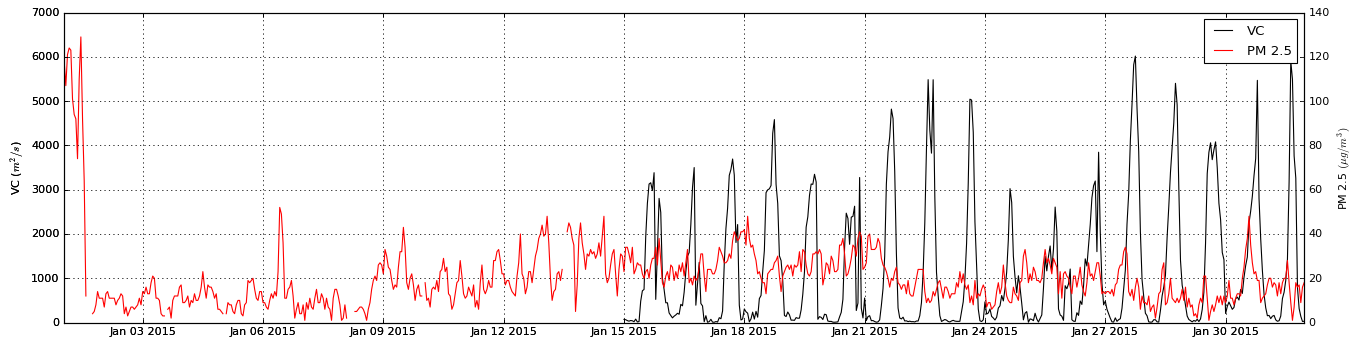

In [35]:
plt.figure(figsize=[20,5])
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust()
par1 = host.twinx()

#offset = 60
#new_fixed_axis = par2.get_grid_helper().new_fixed_axis

#host.set_xlim(0, 13)
#host.set_ylim(0, 2)

#host.set_xlabel("Días")
host.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("PM 2.5 $(\mu g/m^3)$")

#host.scatter(np.linspace(1,12, 12), vc_max_mes, marker='d', c = 'k')
host.plot(jan_vc['VC_24'],  c = 'k', label = 'VC')

#par1.scatter(np.linspace(1,12, 12), pm25_max_mes, marker='s', c = 'r')
par1.plot(pm25_2015["2015-01-01":"2015-01-31"]['pm25'], c = 'r', label = 'PM 2.5')
#par1.set_ylim(0, 4)

host.legend()
host.grid()
#host.axis["left"].label.set_color(p1.get_color())
#par1.axis["right"].label.set_color(p2.get_color())
#host.set_xticks(range(1,13));
#host.set_xticklabels();


## CO

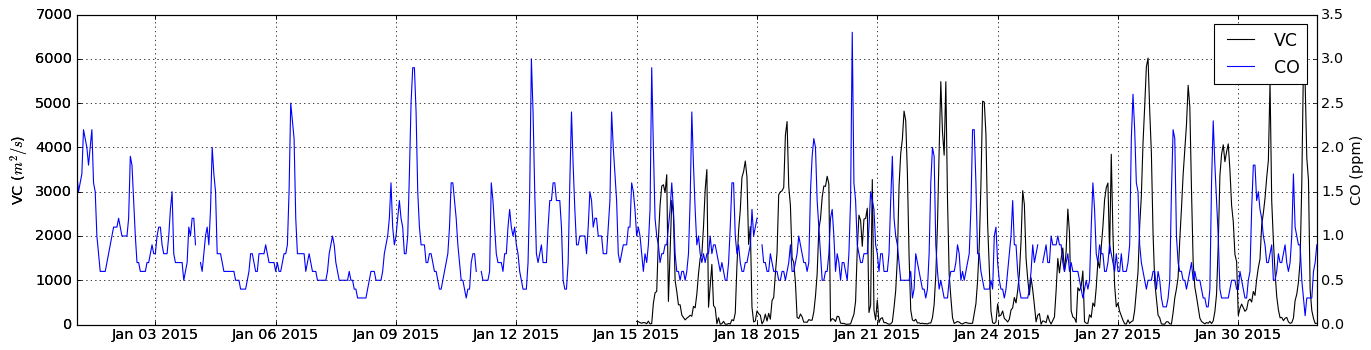

In [41]:
plt.figure(figsize=[20,5])
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust()
par1 = host.twinx()

#offset = 60
#new_fixed_axis = par2.get_grid_helper().new_fixed_axis

#host.set_xlim(0, 13)
#host.set_ylim(0, 2)

#host.set_xlabel("Días")
host.set_ylabel("VC ($m^2/s$)")
par1.set_ylabel("CO (ppm)")

#host.scatter(np.linspace(1,12, 12), vc_max_mes, marker='d', c = 'k')
host.plot(jan_vc['VC_24'],  c = 'k', label = 'VC')

#par1.scatter(np.linspace(1,12, 12), co_max_mes, marker='s', c = 'r')
par1.plot(co_2015["2015-01-01":"2015-01-31"]['co'], c = 'b', label = 'CO')
#par1.set_ylim(0, 4)

host.legend()
host.grid()
plt.rcParams.update({'font.size': 13})
#host.axis["left"].label.set_color(p1.get_color())
#par1.axis["right"].label.set_color(p2.get_color())
#host.set_xticks(range(1,13));
#host.set_xticklabels();


In [42]:
blt.E1or30('jan')

'31'